<a href="https://colab.research.google.com/github/Debasish-25/Fortune-500/blob/main/New_Year_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Loading the dataset

In [9]:
# Load dataset
df = pd.read_csv("New Year Sales Data.csv",encoding='latin1') # Please update this path to the correct location of your file in Google Drive

# First 5 rows
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [10]:
df.shape

(11251, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


## Data Cleaning

In [13]:
#Check for null values
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [14]:
# Dropping unrequired columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [15]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [18]:
df.shape

(11239, 13)

In [19]:
df['Amount'] = df['Amount'].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [21]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


## Data overview & Summary

In [22]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [23]:
df.nunique()

,0
User_ID,3752
Cust_name,1250
Product_ID,2350
Gender,2
Age Group,7
Age,81
Marital_Status,2
State,16
Zone,5
Occupation,15


## EDA (Exploratory Data Analysis)

## 1. Gender analysis

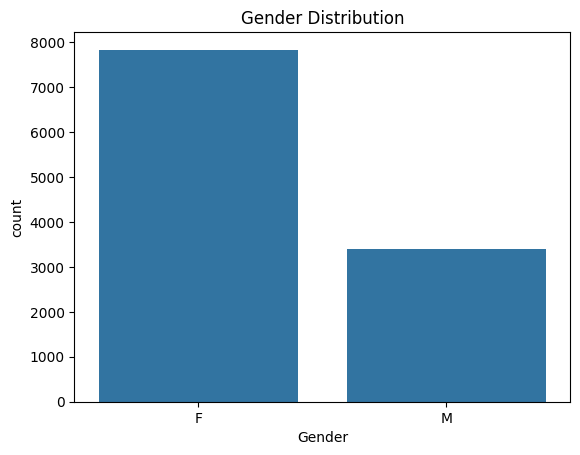

In [24]:
## Which gender has higher purchasing power?
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


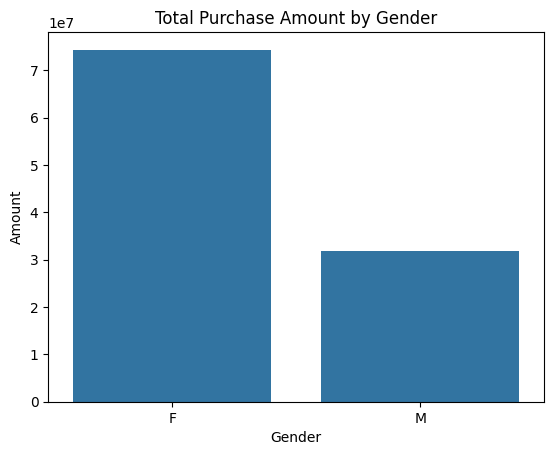

In [25]:
## total purchase amount by gender.
gender_amount = df.groupby('Gender')['Amount'].sum().reset_index()

sns.barplot(x='Gender', y='Amount', data=gender_amount)
plt.title("Total Purchase Amount by Gender")
plt.show()


In [26]:
## Key Insights
# There are mostly female customers

## 2. Age group analysis

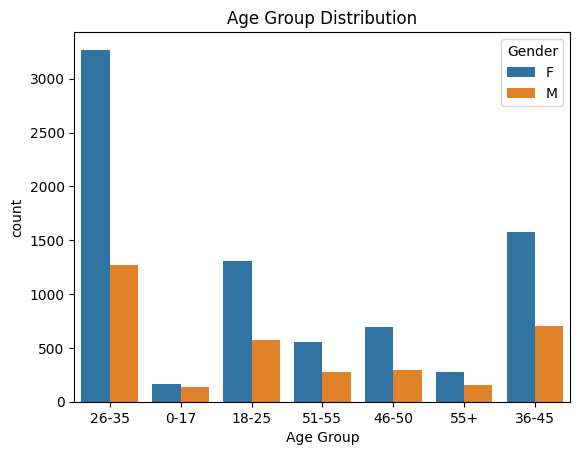

In [27]:
## Which age group has the most purchases, and is there a trend in purchasing power by age?
sns.countplot(x='Age Group', hue = 'Gender',data=df)
plt.title("Age Group Distribution")
plt.show()


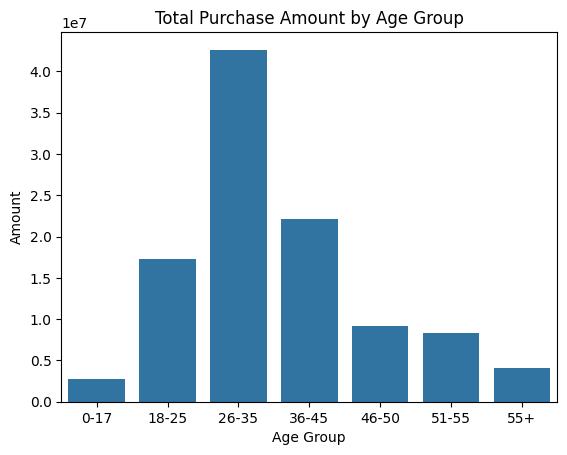

In [28]:
# total purchases by age group
age_amount = df.groupby('Age Group')['Amount'].sum().reset_index()

sns.barplot(x='Age Group', y='Amount', data=age_amount)
plt.title("Total Purchase Amount by Age Group")
plt.xticks(rotation=0)
plt.show()


In [29]:
## Key Insights
# There is a trend in purchasing power by age as most age group is 26-35. these group people has high purchasing power.

## 3.State Analysis

In [30]:
## Which states generate the highest number of orders?
top_states_orders = df['State'].value_counts().head(10)
top_states_orders

,count
State,
Uttar Pradesh,1944
Maharashtra,1525
Karnataka,1304
Delhi,1104
Madhya Pradesh,921
Andhra Pradesh,811
Himachal Pradesh,608
Kerala,453
Haryana,452


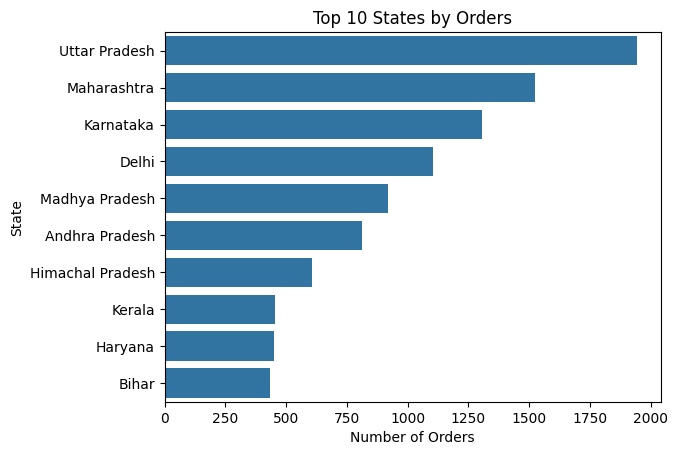

In [31]:
sns.barplot(x=top_states_orders.values, y=top_states_orders.index)
plt.title("Top 10 States by Orders")
plt.xlabel("Number of Orders")
plt.show()

In [32]:
## Which states generate the highest number of revenue?
top_states_amount = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
top_states_amount

,Amount
State,
Uttar Pradesh,19374968
Maharashtra,14427543
Karnataka,13523540
Delhi,11603818
Madhya Pradesh,8101142
Andhra Pradesh,8037146
Himachal Pradesh,4963368
Haryana,4220175
Bihar,4022757


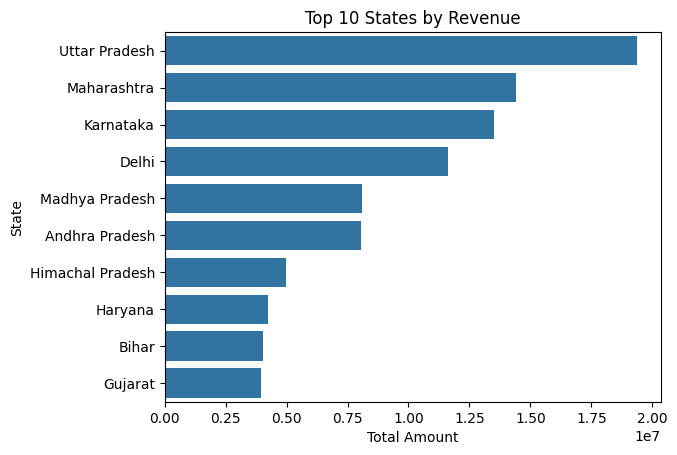

In [33]:
sns.barplot(x=top_states_amount.values, y=top_states_amount.index)
plt.title("Top 10 States by Revenue")
plt.xlabel("Total Amount")
plt.show()

In [34]:
## Key Insights
# Most of the orders are from Uttar Pradesh followed by Maharashtra and many more.

## 4. Marital Status Analysis

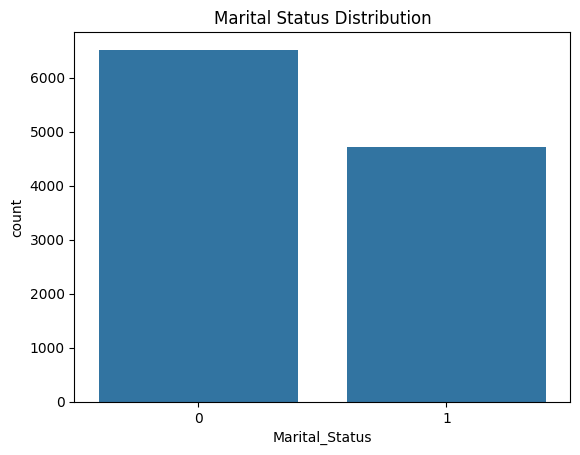

In [35]:
## How does marital status affect purchasing behavior?
sns.countplot(x='Marital_Status', data=df)
plt.title("Marital Status Distribution")
plt.show()

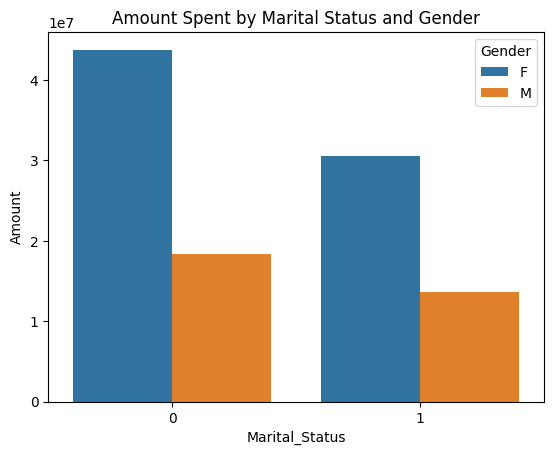

In [36]:
marital_amount = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index()

sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=marital_amount)
plt.title("Amount Spent by Marital Status and Gender")
plt.show()


In [37]:
## Key Insights
# Most of the items are purchased by unmarried category and by females

## 5. Occupation Analysis


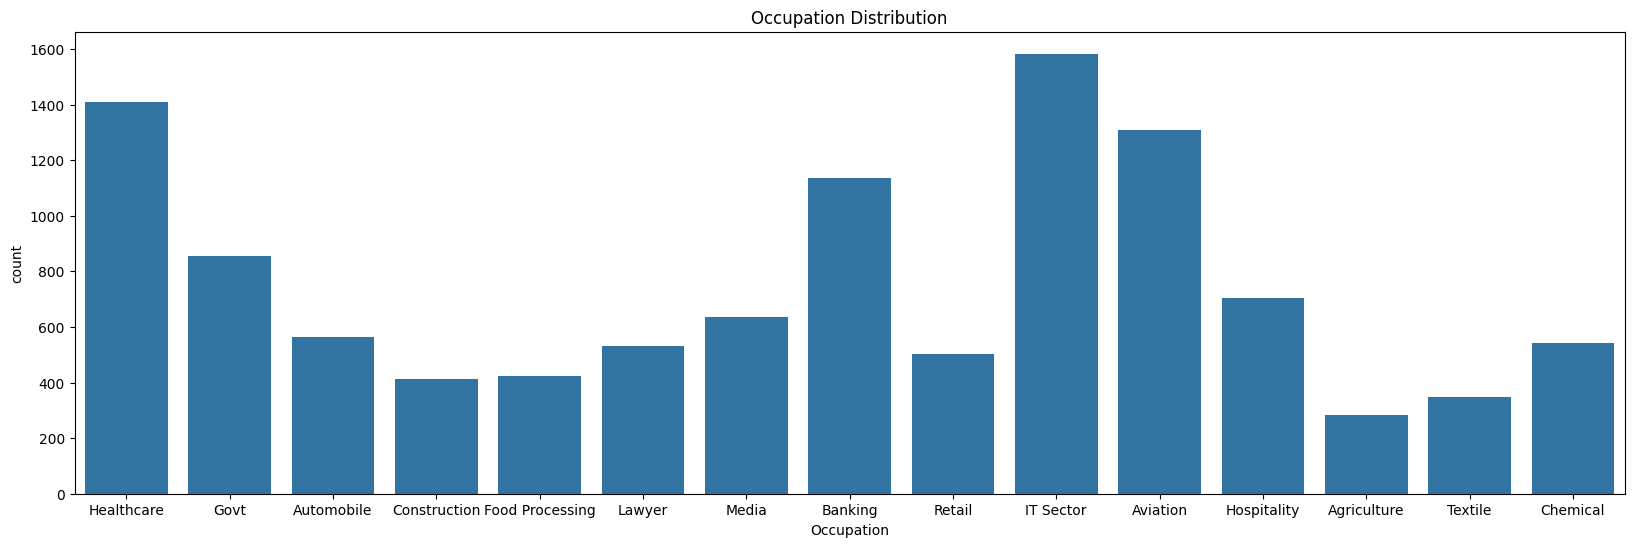

In [38]:
## Which occupations contribute most to sales?
plt.figure(figsize=(20,6))
sns.countplot(x='Occupation', data=df)
plt.title("Occupation Distribution")
plt.show()

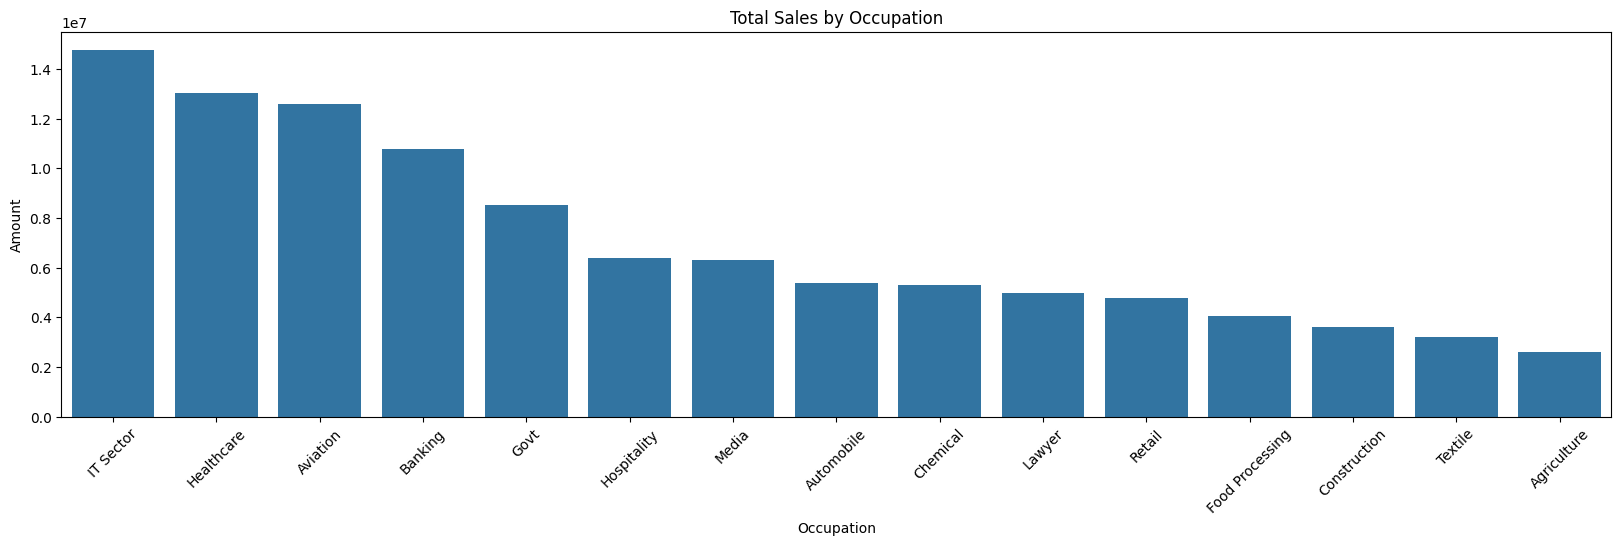

In [39]:
occupation_amount = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(20,5))
sns.barplot(x='Occupation', y='Amount', data=occupation_amount)
plt.title("Total Sales by Occupation")
plt.xticks(rotation=45)
plt.show()


In [40]:
## Key Insights
# IT Sector occupation contributes more to the sales followed by healthcare and aviation and many more.

## 6. Product Category Analysis

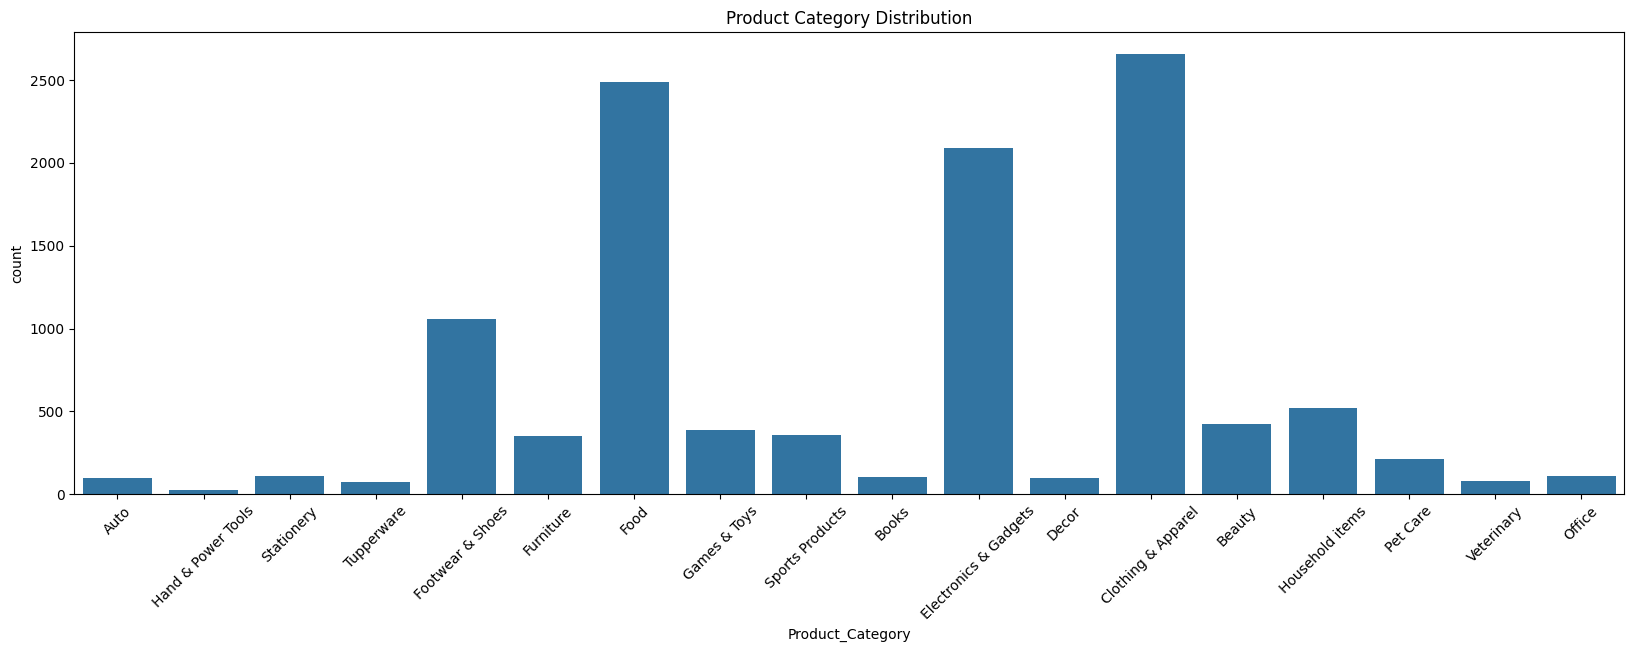

In [41]:
## What product categories are the most popular, and which ones generate the most revenue?
plt.figure(figsize=(20,6))
sns.countplot(x='Product_Category', data=df)
plt.title("Product Category Distribution")
plt.xticks(rotation=45)
plt.show()

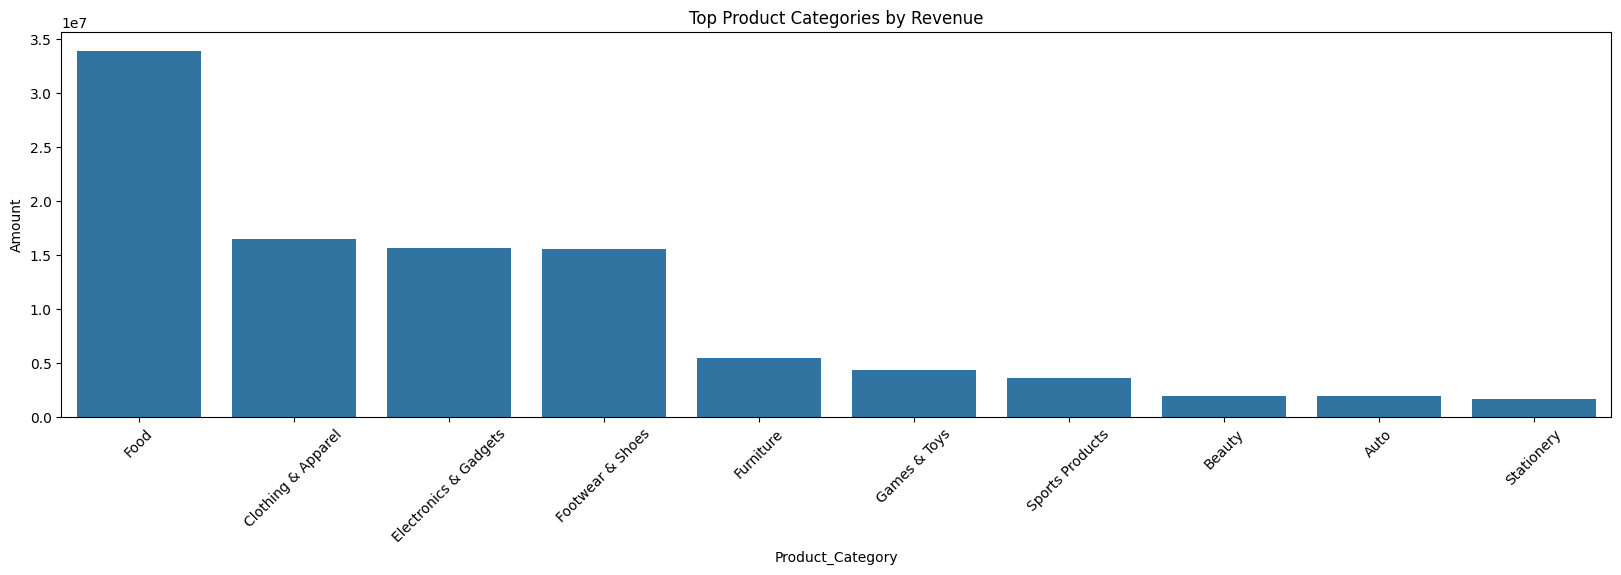

In [42]:
product_amount = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(20,5))
sns.barplot(x='Product_Category', y='Amount', data=product_amount)
plt.title("Top Product Categories by Revenue")
plt.xticks(rotation=45)
plt.show()


In [43]:
## Key Insights
# The most famous product category is Food which generates most of the revenue.